In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

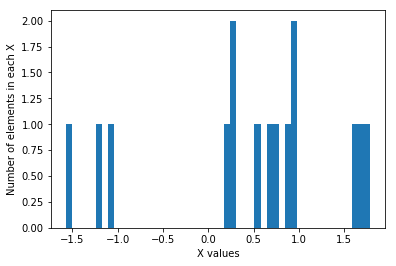

In [14]:
number_of_sums = 15
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

In [15]:
#Честно говоря, это задание я делала просто подбором, потому что не поняла, как нужно было посчитать number_of_sums

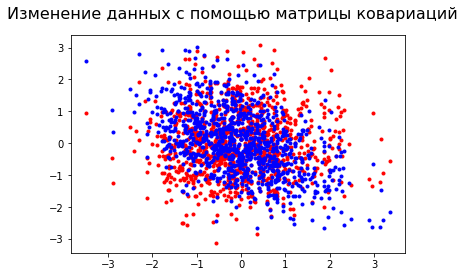

In [27]:
import numpy.linalg as la
n = 1000
C = [[1,-0.5],[-0.5,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

In [28]:
#и вот это тоже наугад

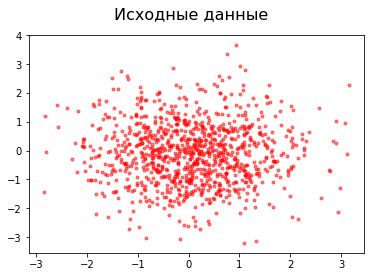

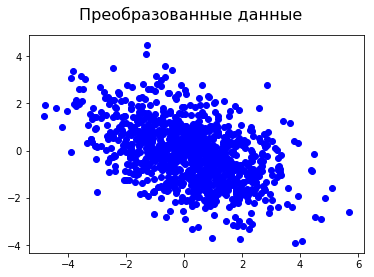

In [38]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = np.matrix('2 -1; -1 2')
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

In [39]:
#здесь тоже наугад

In [53]:
import math
theta = 147 
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)

генерация данных:  2.996254966152234
теоритический подсчет:  [[2.96610999]]


In [55]:
#угол поворота примерно на 147

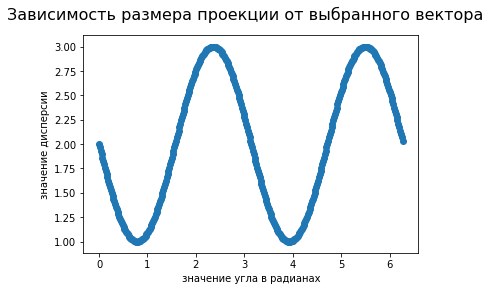

In [54]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

In [ ]:
#Максимальный разброс получается при угле примерно 2,4, это примерно 145-150 граусов

In [68]:
#я честно пыталась сделать на этом датасете http://yustiks.ru/faults.csv, но мне не понятно, что обозначают все столбцы,
#На kaggle автор тоже не очень понимает из значение. Поэтому я взяла датасет про авокадо
import io
import requests
url="http://yustiks.ru/avocado.csv"
avocado_df=pd.read_csv(url)
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [69]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(avocado_df[['4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1         2
0 -0.999909 -0.994680 -0.999962
1 -0.999941 -0.995639 -0.999954
2 -0.999930 -0.989336 -0.999898
3 -0.999900 -0.992968 -0.999943
4 -0.999917 -0.995717 -0.999940


In [70]:
type_4046 = df_norm[0]
type_4225 = df_norm[1]
type_4770 = df_norm[2]
df_norm.columns = ['type_4046', 'type_4225', 'type_4770']
df_norm.head()

,type_4046,type_4225,type_4770
0,-0.999909,-0.994680,-0.999962
1,-0.999941,-0.995639,-0.999954
2,-0.999930,-0.989336,-0.999898
3,-0.999900,-0.992968,-0.999943
4,-0.999917,-0.995717,-0.999940


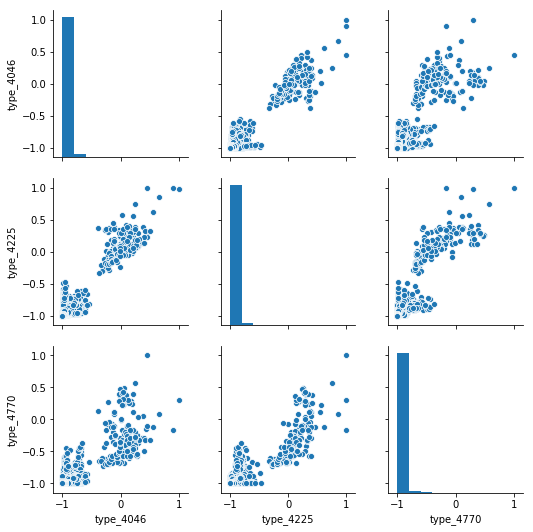

In [71]:
import seaborn as sns
sns.pairplot(df_norm);

In [72]:
#распределение по каждому виду не особо похоже на нормальное, но зато видна положительная корелляция между продажами 3-х видов.
#хотя это не обязательно обозначет влияние продаж одного вида, на продажи другого. Это может просто обозначать общий рост продаж
#всех видов.

In [92]:
#в данных есть какой-то разрыв, видимо там что-то было в продажа в определенный период времени

In [73]:
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])



In [76]:
# считаем матрицу ковариаций для вектора X_1 (type_4046 и type_4225)
X_1 = np.vstack((type_4046, type_4225))
cov_mat(X_1.T) 

array([[1.36719418e-05, 1.12478035e-05],
       [1.12478035e-05, 9.25348315e-06]])

In [77]:
# считаем матрицу ковариаций для вектора X_2 (type_4046 и type_4770)
X_2 = np.vstack((type_4046, type_4770))
cov_mat(X_2.T) 

array([[1.42269467e-09, 3.59553221e-10],
       [3.59553221e-10, 9.08687732e-11]])

In [82]:
# считаем матрицу ковариаций для вектора X_3 (type_4225 и type_4770)
X_3 = np.vstack((type_4225, type_4770))
cov_mat(X_3.T) 

array([[1.39522982e-05, 1.13981484e-05],
       [1.13981484e-05, 9.31156894e-06]])

2.2925424937466838e-05 [0.77224731 0.63532204]


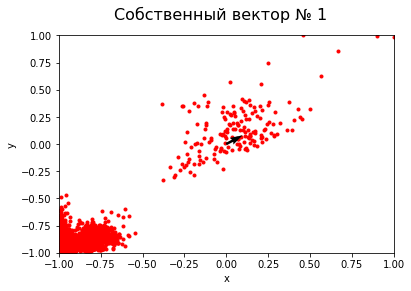

0.0 [-0.63532204  0.77224731]


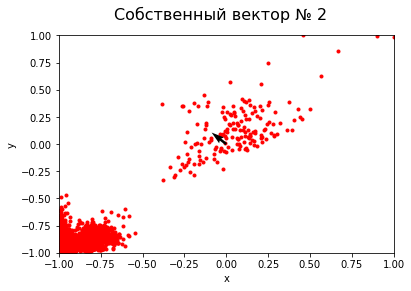

In [100]:
#собственный вектор для (type_4046 и type_4225)
n=1000
Cb = cov_mat(X_1.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X_1[0,:], X_1[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

1.5135634411966643e-09 [0.96951724 0.24502309]


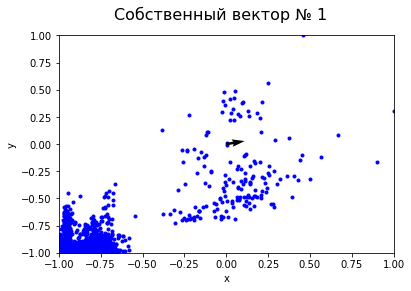

-2.5849394142282115e-26 [-0.24502309  0.96951724]


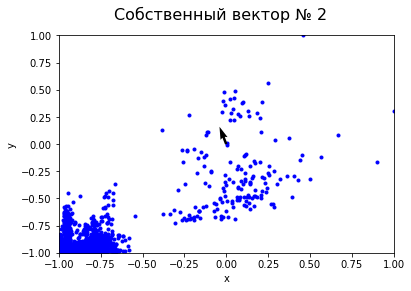

In [110]:
#собственный вектор для (type_4046 и type_4770)
n=1000
Cb2 = cov_mat(X_2.T)

w2,v2 = la.eig(Cb2)

for i2 in range(len(w2)):
    plt.suptitle('Собственный вектор № '+ str(i2+1), fontsize=16)    
    plt.plot(X_2[0,:], X_2[1,:], 'b.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w2[i2], v2[:,i2])
    plt.quiver(0,0, v2[:,i2][0], v2[:,i2][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

2.326386709444647e-05 [0.77442956 0.63266015]


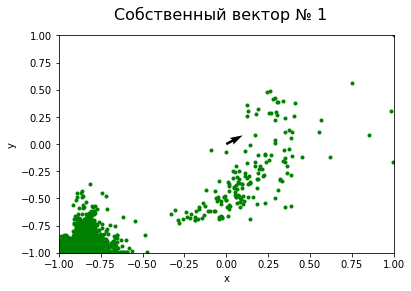

-1.6940658945086007e-21 [-0.63266015  0.77442956]


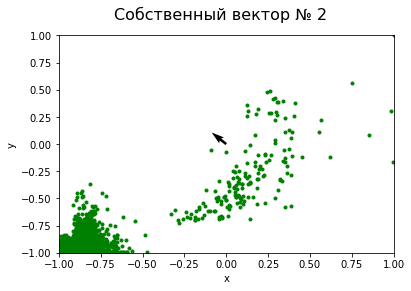

In [118]:
#собственный вектор для (type_4225 и type_4770)
n=1000
Cb3 = cov_mat(X_3.T)

w3,v3 = la.eig(Cb3)

for i3 in range(len(w3)):
    plt.suptitle('Собственный вектор № '+ str(i3+1), fontsize=16)    
    plt.plot(X_3[0,:], X_3[1,:], 'g.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w3[i3], v3[:,i3])
    plt.quiver(0,0, v3[:,i3][0], v3[:,i3][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

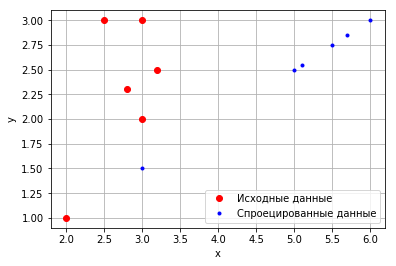

In [114]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
P = np.array([[1,0.5],[1,0.5]])
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

In [115]:
#код для моделирования 100 подбрасываний игрального кубика

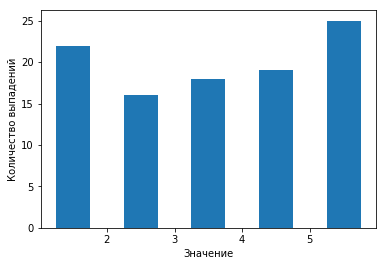

In [133]:
import random
number_of_trials =100
list_of_values = []
for i in range(number_of_trials):
    list_of_values.append(random.randint( 1,6))

    
side=[1,2,3,4,5,6]    
plt.hist(list_of_values, side, rwidth=0.5)
plt.xlabel('Значение')
plt.ylabel('Количество выпадений')
plt.show()
